In [1]:
# load the tensorboard notebook extension
%load_ext tensorboard

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
import datetime

# clear any logs from previous runs
!rm -rf ./logs/

from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
import os

In [4]:
train_dir = '../Flag_Data/train'
val_dir = '../Flag_Data/val'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

batch_size = 64

# train dataset 불러오기
trainGen = imageGenerator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    subset='training',
    class_mode='categorical'
)

# val dataset 불러오기
validationGen = imageGenerator.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    subset='validation',
    class_mode='categorical'
)

Found 1830 images belonging to 7 classes.
Found 38 images belonging to 7 classes.


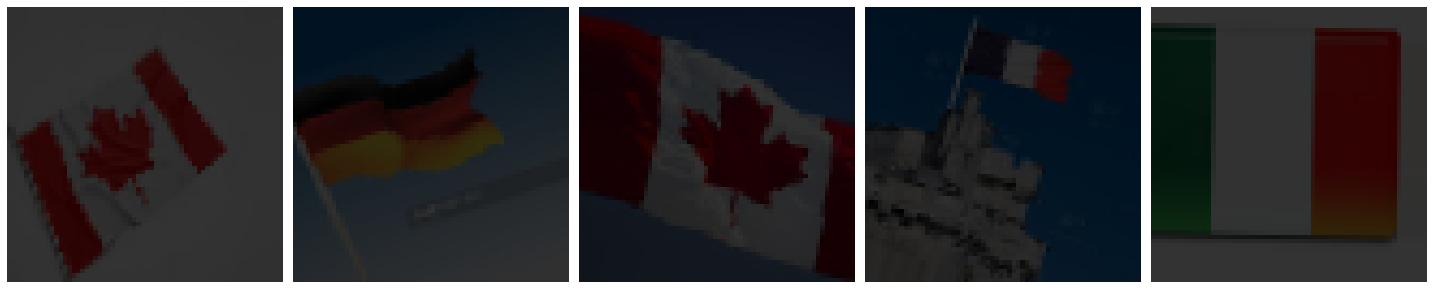

In [6]:
#옮겨 담기
sample_training_images, _ = next(trainGen)

# 이미지를 보여주는 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [7]:
# import tensorflow.keras modules

from tensorflow.keras.layers import InputLayer 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import MaxPooling2D

In [8]:
# sequential model test
model_seq = keras.Sequential()

model_seq.add(InputLayer(input_shape=(64,64,3)))
model_seq.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_seq.add(MaxPooling2D(pool_size=(2,2)))
model_seq.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_seq.add(MaxPooling2D(pool_size=(2,2)))
model_seq.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model_seq.add(MaxPooling2D(pool_size=(2,2)))
model_seq.add(Flatten())
model_seq.add(Dense(128, activation ='relu'))
model_seq.add(Dense(7, activation='softmax'))

model_seq.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [9]:
# import tensorflow.keras modules

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import InputLayer 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import MaxPooling2D

In [10]:
 
# functional model test
inputs = Input(shape=(64,64,3))

x = Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)

y = Dense(128, activation='relu')(x)
output = Dense(7, activation='softmax')(y)

model_func = Model(inputs=inputs, outputs=output)
model_func.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_func.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 2,098,631
Trainable params: 2,098,631
Non-trainable params: 0
___________________________________________________

In [11]:
epochs = 5

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

def train_model(model, train_data, valid_data, tensorboard_callback, epochs=5):
    history = model.fit(
    train_data, 
    epochs=epochs,
    steps_per_epoch=train_data.samples / epochs, 
    validation_data=valid_data,
    validation_steps=valid_data.samples / epochs,
    callbacks=[tensorboard_callback]
)

In [ ]:
train_model(model_func, trainGen, validationGen, tensorboard_callback, 5)

Epoch 1/5
366/366 [==============================] - 24s 66ms/step - loss: 1.1984 - accuracy: 0.5755 - val_loss: 0.6411 - val_accuracy: 0.8355
Epoch 2/5
366/366 [==============================] - 23s 63ms/step - loss: 0.7092 - accuracy: 0.7719 - val_loss: 0.4542 - val_accuracy: 0.8750
Epoch 3/5
366/366 [==============================] - 23s 63ms/step - loss: 0.5452 - accuracy: 0.8295 - val_loss: 0.3449 - val_accuracy: 0.9145
Epoch 4/5
366/366 [==============================] - 23s 64ms/step - loss: 0.4466 - accuracy: 0.8625 - val_loss: 0.4201 - val_accuracy: 0.8750
Epoch 5/5
270/366 [=====================>........] - ETA: 6s - loss: 0.3867 - accuracy: 0.8766